**RACHABATTUNI SAI SHANKAR**

**Second Assignment is Summer Olympics Data Analysis**

**Summer Olympics Data Analysis Assignment**

In [34]:
import numpy as np                                               
import pandas as pd                                               
import pandas_profiling
import matplotlib.pyplot as plt                                    
import seaborn as sns

%matplotlib inline
sns.set()


from subprocess import check_output

In [35]:
df = pd.read_csv('/content/summer.csv')


In [36]:
df

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver
...,...,...,...,...,...,...,...,...,...
31160,2012,London,Wrestling,Wrestling Freestyle,"JANIKOWSKI, Damian",POL,Men,Wg 84 KG,Bronze
31161,2012,London,Wrestling,Wrestling Freestyle,"REZAEI, Ghasem Gholamreza",IRI,Men,Wg 96 KG,Gold
31162,2012,London,Wrestling,Wrestling Freestyle,"TOTROV, Rustam",RUS,Men,Wg 96 KG,Silver
31163,2012,London,Wrestling,Wrestling Freestyle,"ALEKSANYAN, Artur",ARM,Men,Wg 96 KG,Bronze


**Understanding Summer Olympics Dataset**

In [37]:
df.shape

(31165, 9)

In [38]:
df.columns[:]

Index(['Year', 'City', 'Sport', 'Discipline', 'Athlete', 'Country', 'Gender',
       'Event', 'Medal'],
      dtype='object')

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31165 entries, 0 to 31164
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        31165 non-null  int64 
 1   City        31165 non-null  object
 2   Sport       31165 non-null  object
 3   Discipline  31165 non-null  object
 4   Athlete     31165 non-null  object
 5   Country     31161 non-null  object
 6   Gender      31165 non-null  object
 7   Event       31165 non-null  object
 8   Medal       31165 non-null  object
dtypes: int64(1), object(8)
memory usage: 2.1+ MB


In [40]:
df.nunique()

Year             27
City             22
Sport            43
Discipline       67
Athlete       22762
Country         147
Gender            2
Event           666
Medal             3
dtype: int64

In [41]:
df.count()

Year          31165
City          31165
Sport         31165
Discipline    31165
Athlete       31165
Country       31161
Gender        31165
Event         31165
Medal         31165
dtype: int64

**Check for Null values in dataset**

In [42]:
df.isnull().sum()

Year          0
City          0
Sport         0
Discipline    0
Athlete       0
Country       4
Gender        0
Event         0
Medal         0
dtype: int64

**Check for Duplicates values**

In [43]:
df.duplicated().sum()

2

**Getting the top 5 rows of dataset.**

In [44]:
df.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


**Getting the bottom 5 rows in dataset**

In [45]:
df.tail() 

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
31160,2012,London,Wrestling,Wrestling Freestyle,"JANIKOWSKI, Damian",POL,Men,Wg 84 KG,Bronze
31161,2012,London,Wrestling,Wrestling Freestyle,"REZAEI, Ghasem Gholamreza",IRI,Men,Wg 96 KG,Gold
31162,2012,London,Wrestling,Wrestling Freestyle,"TOTROV, Rustam",RUS,Men,Wg 96 KG,Silver
31163,2012,London,Wrestling,Wrestling Freestyle,"ALEKSANYAN, Artur",ARM,Men,Wg 96 KG,Bronze
31164,2012,London,Wrestling,Wrestling Freestyle,"LIDBERG, Jimmy",SWE,Men,Wg 96 KG,Bronze


**Displaying Cities**

In [46]:
df["City"].unique()

array(['Athens', 'Paris', 'St Louis', 'London', 'Stockholm', 'Antwerp',
       'Amsterdam', 'Los Angeles', 'Berlin', 'Helsinki',
       'Melbourne / Stockholm', 'Rome', 'Tokyo', 'Mexico', 'Munich',
       'Montreal', 'Moscow', 'Seoul', 'Barcelona', 'Atlanta', 'Sydney',
       'Beijing'], dtype=object)

In [48]:
for City in df["City"].unique():
    print([City , len(df[df["City"] == City])])

['Athens', 2149]
['Paris', 1396]
['St Louis', 470]
['London', 3567]
['Stockholm', 885]
['Antwerp', 1298]
['Amsterdam', 710]
['Los Angeles', 2074]
['Berlin', 875]
['Helsinki', 889]
['Melbourne / Stockholm', 885]
['Rome', 882]
['Tokyo', 1010]
['Mexico', 1031]
['Munich', 1185]
['Montreal', 1305]
['Moscow', 1387]
['Seoul', 1546]
['Barcelona', 1705]
['Atlanta', 1859]
['Sydney', 2015]
['Beijing', 2042]


**Drop the duplicates rows from the original dataset**

In [50]:
df.drop_duplicates(inplace=True)

**Checking for duplicates rows after deletion**

In [51]:
df.duplicated().sum()

0

In [52]:
df.isnull().sum()

Year          0
City          0
Sport         0
Discipline    0
Athlete       0
Country       4
Gender        0
Event         0
Medal         0
dtype: int64

**1. In how many cities Summer Olympics is held so far?**

In [53]:
print("Number of Cities Held Summer Olympics: ",df["City"].nunique())

Number of Cities Held Summer Olympics:  22


**2. Which sport is having most number of Gold Medals so far? (Top 5)**

In [55]:
data=[]
for Sport in df["Sport"].unique():
    data.append([Sport , len(df[df["Sport"] == Sport])])
pd.DataFrame(data,columns = ['Sport','Medal']).sort_values(by='Medal', ascending=False)

,Sport,Medal
0,Aquatics,4170
1,Athletics,3638
17,Rowing,2667
4,Gymnastics,2307
3,Fencing,1613
14,Football,1497
24,Hockey,1421
8,Wrestling,1212
5,Shooting,1150
19,Sailing,1109


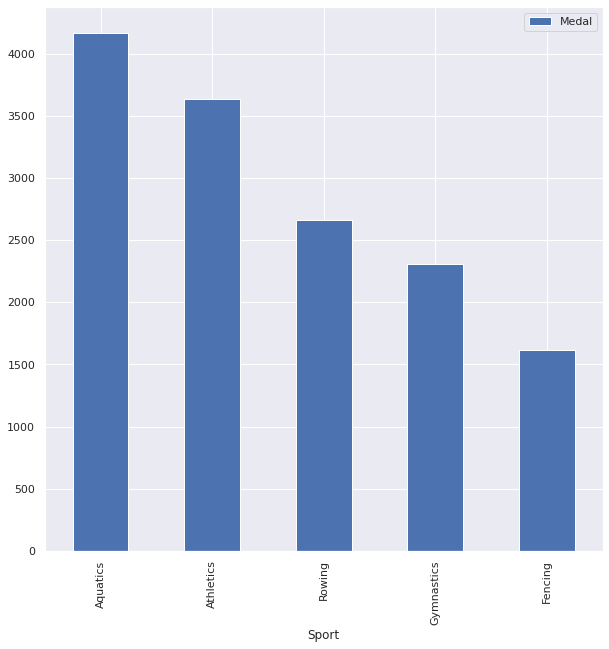

In [57]:
data=[]
for Sport in df["Sport"].unique():
    data.append([Sport , len(df[df["Sport"] == Sport])])
pd.DataFrame(data,columns = ['Sport','Medal']).sort_values(by='Medal', ascending=False).head().plot(x = 'Sport', y = 'Medal', kind = 'bar', figsize = (10,10))


**3. Which sport is having most number of medals so far? (Top 5)**

In [59]:
data=[]
for Sport in df["Sport"].unique():
    data.append([Sport , len(df[df["Sport"] == Sport])])
pd.DataFrame(data,columns = ['Sport','Medal']).sort_values(by='Medal', ascending=False).head()

,Sport,Medal
0,Aquatics,4170
1,Athletics,3638
17,Rowing,2667
4,Gymnastics,2307
3,Fencing,1613


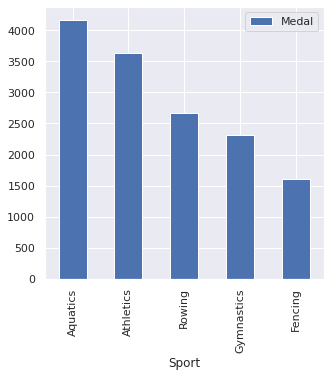

In [61]:
data=[]
for Sport in df["Sport"].unique():
    data.append([Sport , len(df[df["Sport"] == Sport])])
pd.DataFrame(data,columns = ['Sport','Medal']).sort_values(by='Medal', ascending=False).head().plot(x = 'Sport', y = 'Medal', kind = 'bar', figsize = (5,5))


**4. Which player has won most number of medals? (Top 5)**

In [62]:
df.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


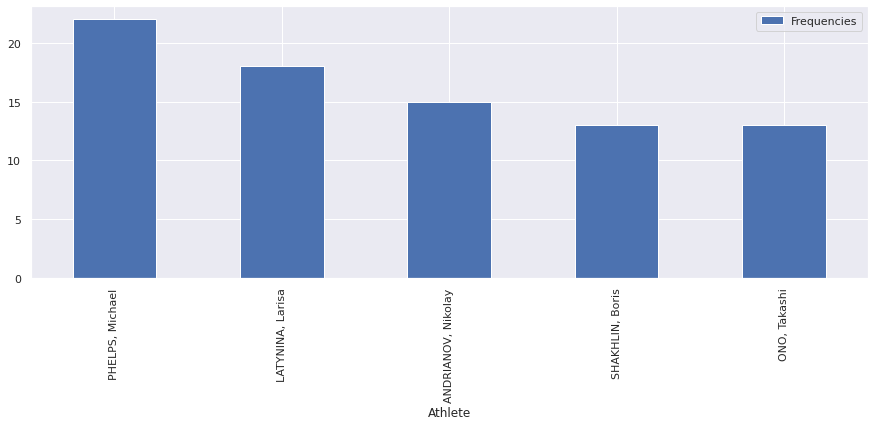

In [64]:
data = []

for Athlete in df['Athlete'].unique():
    data.append([Athlete , len(df[df['Athlete']  == Athlete])])

pd.DataFrame(data,columns = ['Athlete','Frequencies']).sort_values(by='Frequencies', ascending=False).head().plot(x = 'Athlete', y = 'Frequencies', kind = 'bar', figsize = (15,5))


**5. Which player has won most number Gold Medals of medals? (Top 5)**

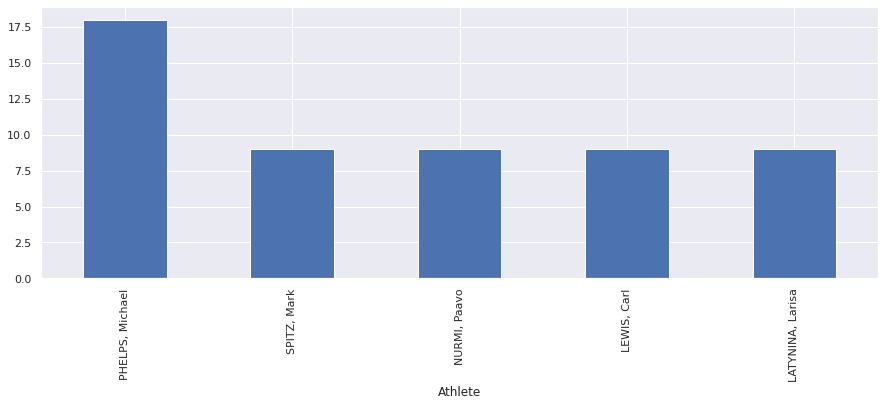

In [66]:
gold = df[df['Medal']=='Gold'].groupby('Athlete').count().sort_values(['Medal'],ascending=False)
gold['Medal'].head().plot(x = 'Athlete', y = 'Medal', kind = 'bar', figsize = (15,5))

**6. In which year India won first Gold Medal in Summer Olympics?**

In [68]:
india = df[df['Country']=='IND']
indiaGold = india[india['Medal']=='Gold'].sort_values(['Year'],ascending=True)
print(indiaGold['Year'].head(1))

5512    1928
Name: Year, dtype: int64


**7. Which event is most popular in terms on number of players? (Top 5)**

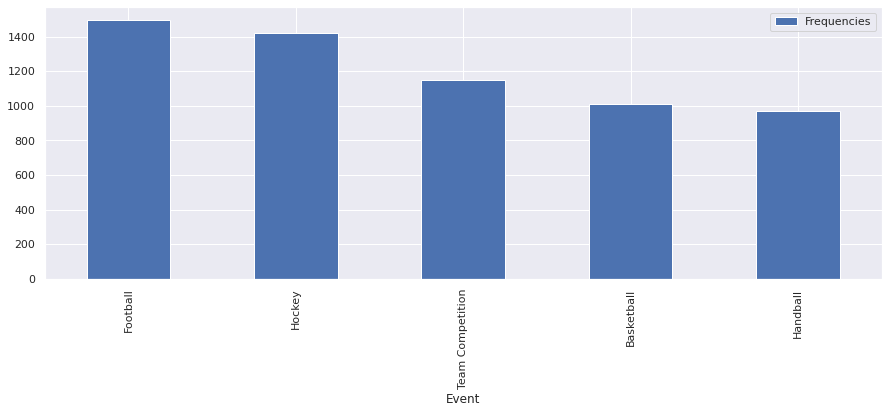

In [70]:

data = []

for Event in df['Event'].unique():
    data.append([Event , len(df[df['Event']  == Event])])

pd.DataFrame(data,columns = ['Event','Frequencies']).sort_values(by='Frequencies', ascending=False).head().plot(x = 'Event', y = 'Frequencies', kind = 'bar', figsize = (15,5))

**8. Which sport is having most female Gold Medalists? (Top 5)**

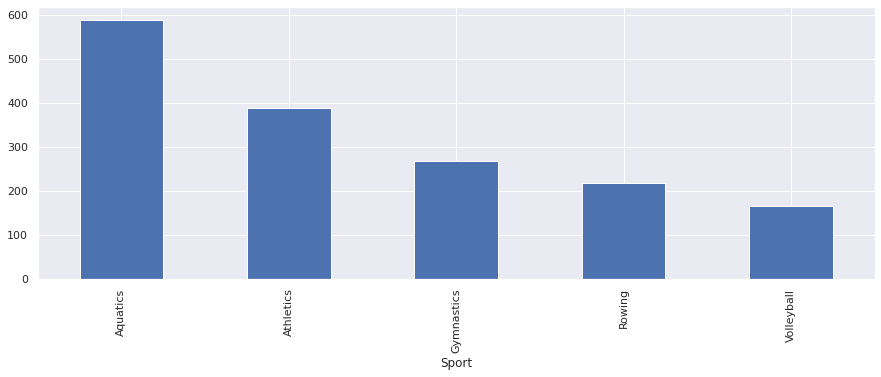

In [72]:
gold = df[df['Medal']=='Gold']
femaleGold = gold[gold['Gender']=='Women'].groupby('Sport').count().sort_values(['Medal'],ascending=False)
femaleGold['Medal'].head().plot(x = 'Sport', y = 'Medal', kind = 'bar', figsize = (15,5))